In [8]:
import numpy as np
from matplotlib import pyplot as plt
import pipeline_functions as pf
%matplotlib inline


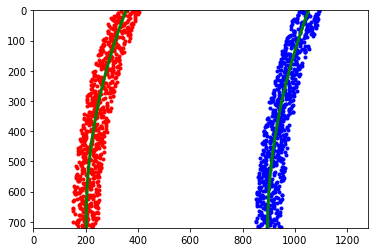

In [9]:
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

In [19]:
lpts = {'x':leftx,'y':ploty}
rpts = {'x':rightx,'y':ploty}
points = {'left':lpts, 'right':rpts}

actual = pf.calculate_curvature2((720,1280), points)
expected = [632.1, 626.2, 0]# Example values: 632.1 m    626.2 m
print("expected : \t{}".format(expected))
print("actual : \t{}".format(actual))
print("relative error:\t{}".format(100*np.abs(actual-expected)/np.max(np.vstack((expected, actual)))))

expected : 	[632.1, 626.2, 0]
actual : 	[  5.07275943e+02   5.62487105e+02   1.00428571e-01]
relative error:	[  1.97475172e+01   1.00795595e+01   1.58880828e-02]
